# SUPPORT VECTOR MACHINE

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

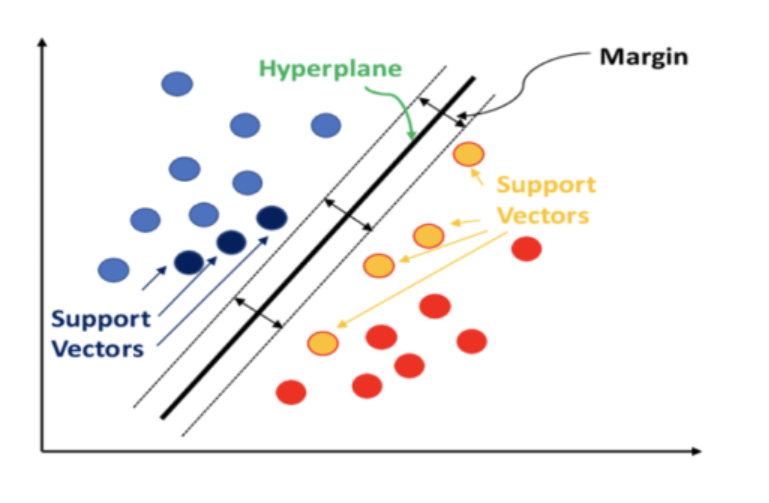
In SVM, the goal is to find a hyperplane that can best separate the data points into different classes. The hyperplane is chosen such that it maximizes the margin between the classes, i.e., the distance between the hyperplane and the closest data points from each class. The data points that are closest to the hyperplane are called support vectors.<br>
To make the threshold that is not so sensitive to outliers we must allow **misclassifications**.<br>
Choosing a threshold that allows isclassifications is an example of the **Bias/Variance** Tradeoff.<br>
**How to choose the Hyperlane?**<br>
We choose the hyperplane so that distance from it to the support vectors on each side is maximized. If such a hyperplane exists, it is known as the maximum margin hyperplane and the linear classifier it defines is known as a maximum margin classifier.<br>

The main idea behind the Support Vector machines are :
<ol>
<li>Start with data in relatively low dimesion.</li>
<li>Move the data into a higher dimension.</li>
<li>Find the Supposrt Vector Classifier that separates the higher dimensioal data into two groups.</li>
</ol>
Now the question arises how to move data into higher dimesons?
<br>So, in oredr to amke the mathematics possible, Support Vector machine use something called Kernel Functions to systematically find Support Vector Classifier in higher dimesnions.<br>
<b>Kernel functions only calculate the relationships between every pair of points as if they are in higher dimensions; they don't actually do the transformation.</b><br>

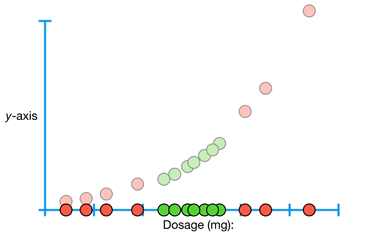
This trick , calucualting the higher-dimesional relationship witout actually transforming the data to the higher dimension, is called <b>The Kernel Trick<b>.

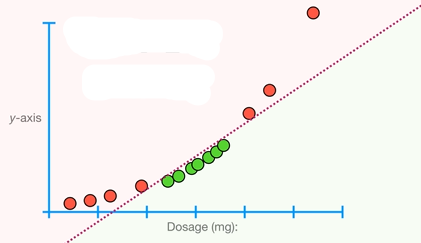
There are some kernels used in SVM:
<ol>
    <li>Linear Kernel</li>
    <li>Radial Kernel</li>
    <li>Polynomial Kernel</li>
    <li>Simoid Kernel</li>
</ol>

## Kernel function
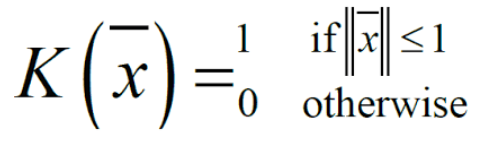)
## Linear Kernel
Linear kernel is used when the data is linearly separable. It means that data can be separated using a single line. It is one of the most common kernels to be used. It is mostly used when there are large number of features in a dataset. Linear kernel is often used for text classification purposes.

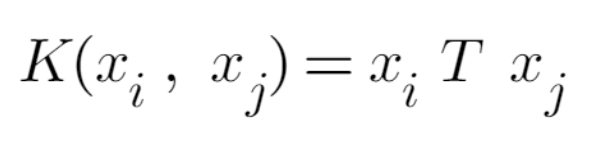
## Polynomial Kernel
Polynomial kernel represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables. The polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of the input samples.<br>
Polynomial kernel is very popular in Natural Language Processing. The most common degree is d = 2 (quadratic).

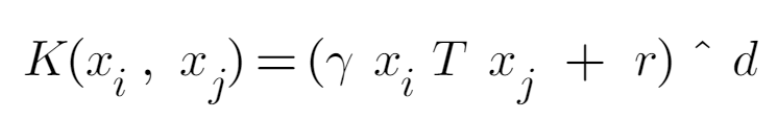
where γ is a scaling factor, r is a constant term, and d is the degree of the polynomial.
## Radial Kernel
Radial basis function kernel is a general purpose kernel. It is used when we have no prior knowledge about the data. The RBF kernel on two samples x and y is defined by the following equation

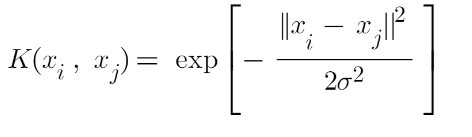
where γ is a scaling factor that controls the "width" of the kernel.
## Sigmoid Kernel
Sigmoid kernel has its origin in neural networks. We can use it as the proxy for neural networks. 

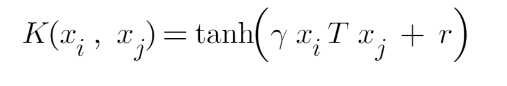
where xi and xj are input feature vectors, γ is a scaling factor, and r is a constant term.

The sigmoid kernel is often used in binary classification problems, and its shape is similar to that of a sigmoid function. The kernel function maps the input data to a higher-dimensional feature space, where a hyperplane can be used to separate the two classes

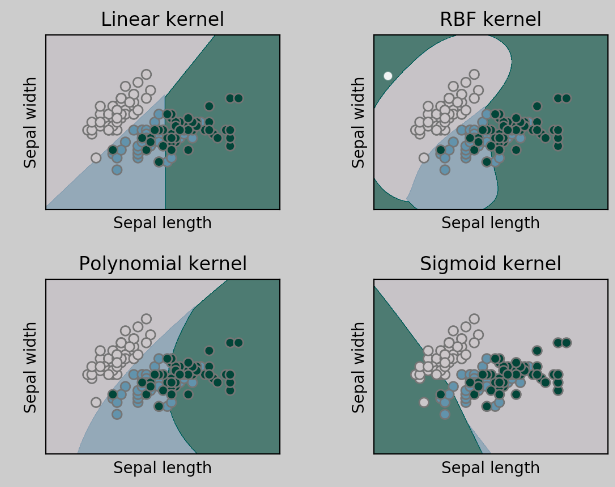

## SVM - Classification Algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
df = pd.read_csv('dataset/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
x = df.iloc[:,[2,3]]
y = df.iloc[:, 4]

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [6]:
x_test.shape

(100, 2)

In [7]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

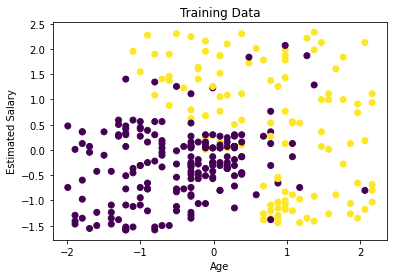

In [8]:
plt.scatter(x_train[:, 0], x_train[:, 1], c= y_train)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training Data')
plt.show()

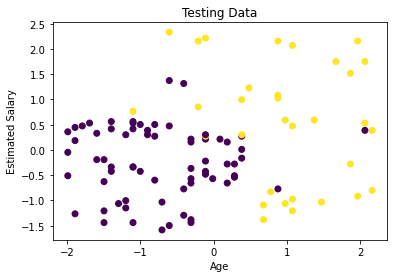

In [9]:
plt.scatter(x_test[:, 0], x_test[:, 1], c= y_test)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Testing Data')
plt.show()

### Linear Kernel

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)
# predicting test set result
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [11]:
from sklearn import metrics 
print("Acuracy Score with linear Kernel", metrics.accuracy_score(y_test, y_pred))

Acuracy Score with linear Kernel 0.9


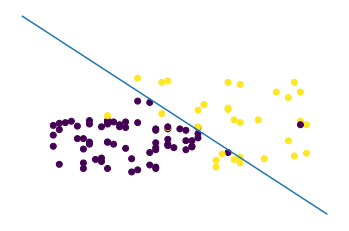

In [12]:
plt.scatter(x_test[:, 0], x_test[:, 1], c= y_test)
# create hyperplane
a = classifier.coef_[0]
b = -a[0]/ a[1]
c = np.linspace(-2.5, 2.5)
d = b *c -(classifier.intercept_[0]/ a[1])
#plot hyperplane
plt.plot(c,d)
plt.axis("off")
plt.show()

### Radial kernel

In [13]:
classifier = SVC(kernel = 'rbf')
classifier.fit(x_train, y_train)
# predicting test set result
y_pred = classifier.predict(x_test)
print("Acuracy Score with rbf Kernel", metrics.accuracy_score(y_test, y_pred))

Acuracy Score with rbf Kernel 0.93


In [14]:
# C -> how much misclassification to avoid
# High gamma -> only nearbly points are considered
classifier = SVC(kernel = 'rbf' , gamma = 15, C=7, random_state = 0)
classifier.fit(x_train, y_train)
# predicting test set result
y_pred = classifier.predict(x_test)
print("Acuracy Score with rbf Kernel with C=7", metrics.accuracy_score(y_test, y_pred))

Acuracy Score with rbf Kernel with C=7 0.89


### Polynomial Kernel

In [15]:
classifier = SVC(kernel = 'poly', degree = 3)
classifier.fit(x_train, y_train)
# predicting test set result
y_pred = classifier.predict(x_test)
print("Acuracy Score with Polynomial Kernel", metrics.accuracy_score(y_test, y_pred))

Acuracy Score with Polynomial Kernel 0.86
